### Downloads and Imports

In [27]:
import json
import os
import copy
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import pandas as pd
import numpy as np
import re
from scipy.stats import wilcoxon
import seaborn as sns
import scipy.stats as stats
import statsmodels.stats.multicomp as mc
# from statannotations.Annotator import Annotator
from constants import *
from funcs import *

CONDITION = 2

## Analysis

### User Accuracy

Accuracy:
Step 1: [13, 12, 12, 9, 11, 15, 11, 13, 17, 11, 12, 14, 15, 12, 11, 15, 12, 13]
Step 2: [13, 15, 13, 10, 14, 16, 15, 16, 15, 11, 14, 14, 15, 13, 13, 17, 15, 15]
Step 3: [15, 14, 13, 11, 15, 16, 15, 16, 16, 11, 13, 16, 14, 13, 13, 15, 15, 15]
F-statistic: 4.3510489510
p-value: 0.0180013422
✅✅✅✅✅


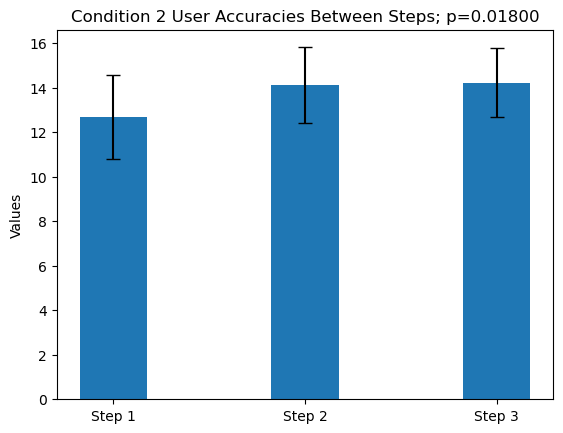

In [28]:
compare = 'user_gt'
data = load_conditions(compare, conditions=CONDITION)
data = prepare_stats(data, data_len=3)

print("Accuracy:")
for i, d in enumerate(data):
    print(f"Step {i+1}: {d}")
f, p = anova(data)
x_labels = [f"Step {i+1}" for i in range(len(data))]
plot_bar_chart(data, x_lables=x_labels, title=f"Condition {CONDITION} User Accuracies Between Steps; p={p:.5f}")

### User change answer

[[2, 7, 1, 1, 7, 1, 6, 3, 2, 2, 2, 2, 0, 3, 2, 2, 5, 2], [2, 1, 0, 3, 1, 0, 0, 0, 1, 0, 7, 4, 1, 2, 0, 2, 0, 0]]
F-statistic: 4.8694915254
p-value: 0.0341897210
✅✅✅✅✅


/Users/Luo/anaconda3/envs/ml-general/lib/python3.10/site-packages/scipy/stats/_axis_nan_policy.py:531: UserWarning:

Exact p-value calculation does not work if there are zeros. Switching to normal approximation.



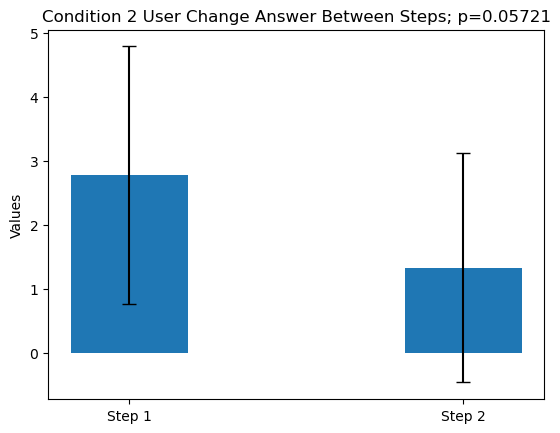

In [29]:
compare = 'user_gt'
data = load_user_change_ans(condition=CONDITION)
data = prepare_stats(data, data_len=2)
print(data)
f, p = anova(data)
f, p = wilcoxon(data[0], data[1])
x_labels = [f"Step {i+1}" for i in range(len(data))]
plot_bar_chart(data, x_lables=x_labels, title=f"Condition {CONDITION} User Change Answer Between Steps; p={p:.5f}")

### User Follow AI Answers

User Follow AI:
Step 1: [16, 13, 17, 12, 12, 14, 12, 12, 12, 14, 9, 13, 16, 13, 12, 12, 15, 16]
Step 2: [18, 20, 18, 13, 19, 15, 18, 15, 14, 16, 11, 15, 16, 16, 14, 14, 20, 18]
Step 3: [20, 19, 18, 16, 20, 15, 18, 15, 15, 16, 16, 19, 17, 16, 14, 16, 20, 18]
F-statistic: 14.6818181818
p-value: 0.0000092049
✅✅✅✅✅


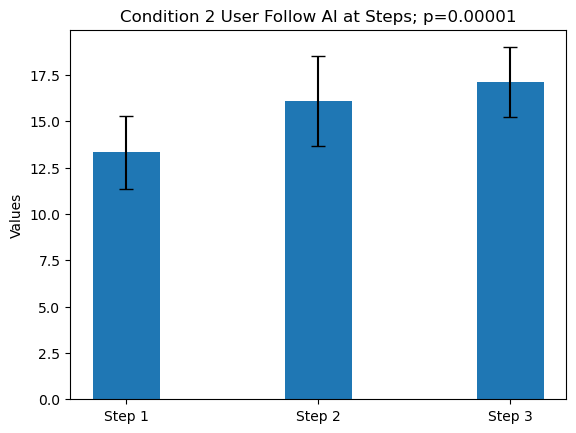

In [30]:
compare = 'user_ai'
data = load_conditions(compare, conditions=CONDITION)
data = prepare_stats(data, data_len=3)

print("User Follow AI:")
for i, d in enumerate(data):
    print(f"Step {i+1}: {d}")
f, p = anova(data)
x_labels = [f"Step {i+1}" for i in range(len(data))]
plot_bar_chart(data, x_lables=x_labels, title=f"Condition {CONDITION} User Follow AI at Steps; p={p:.5f}")

### Survey

[6, 5, 6, 5, 5, 6, 6, 5, 6, 4, 5, 4, 4, 6, 5, 6, 6, 4]
[6, 5, 7, 5, 6, 4, 7, 6, 2, 6, 6, 5, 5, 7, 6, 6, 6, 5]
F-statistic: 0.9562500000
p-value: 0.3350405233


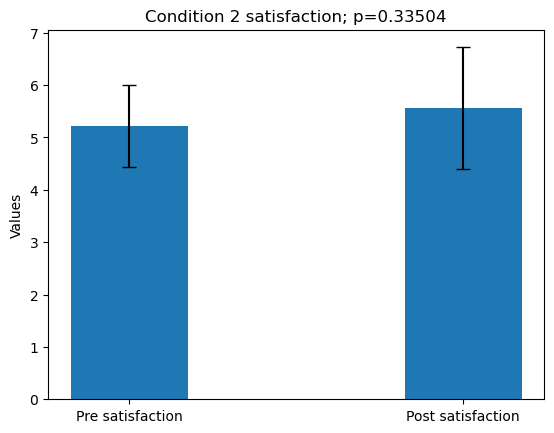

[6, 5, 6, 5, 6, 6, 6, 5, 4, 3, 5, 4, 5, 7, 4, 5, 5, 5]
[6, 5, 7, 5, 7, 5, 7, 6, 4, 6, 5, 5, 5, 7, 5, 7, 6, 6]
F-statistic: 4.4028776978
p-value: 0.0433826361
✅✅✅✅✅


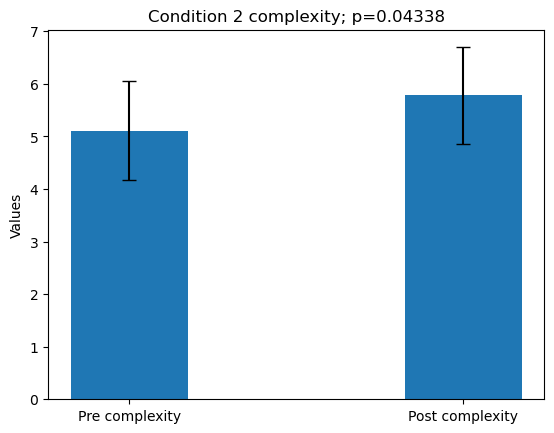

[6, 5, 5, 4, 6, 6, 7, 4, 5, 2, 5, 3, 4, 5, 4, 6, 5, 3]
[6, 5, 7, 5, 6, 6, 7, 7, 1, 5, 5, 5, 5, 7, 6, 6, 6, 5]
F-statistic: 3.5383903793
p-value: 0.0685502053


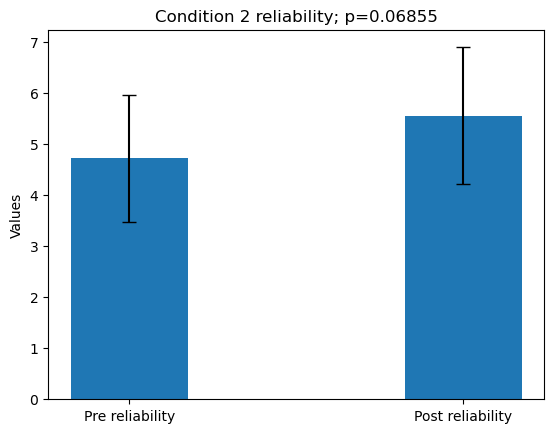

[6, 6, 6, 5, 6, 7, 5, 5, 4, 3, 6, 3, 4, 7, 5, 6, 5, 4]
[4, 5, 4, 5, 6, 6, 7, 5, 2, 4, 3, 4, 4, 6, 6, 6, 6, 5]
F-statistic: 0.4516471838
p-value: 0.5060952059


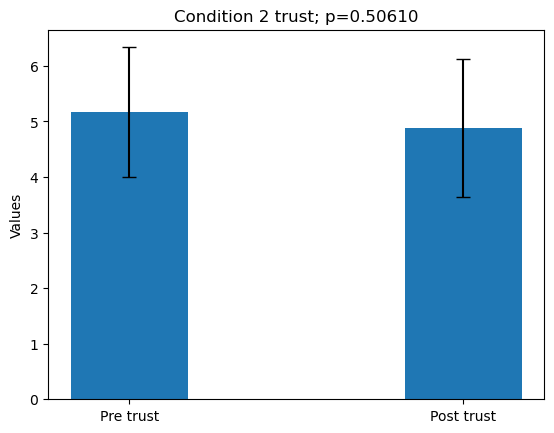

[6, 6, 6, 5, 6, 6, 5, 5, 4, 5, 6, 4, 4, 5, 4, 6, 5, 4]
[6, 6, 6, 5, 7, 5, 6, 5, 2, 6, 4, 5, 5, 6, 6, 6, 6, 6]
F-statistic: 1.0551724138
p-value: 0.3115716779


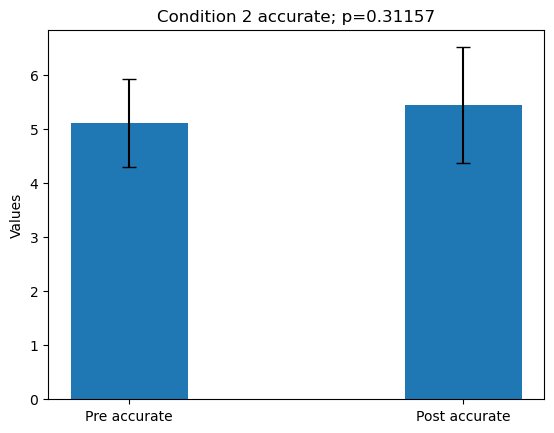

In [31]:
survey_q = 'trust'

for survey_q in ['satisfaction', 'complexity', 'reliability', 'trust', 'accurate']:
    data = load_condition_json(condition=CONDITION)
    pre_sat = []
    post_sat = []
    for i in data.keys():
        pre_sat.append(data[i]['pre_' + survey_q])
        post_sat.append(data[i]['post_' + survey_q])

    data = [pre_sat, post_sat]
    print(pre_sat)
    print(post_sat)
    f, p = anova(data)
    x_labels = [f"Pre {survey_q}", f"Post {survey_q}"]
    plot_bar_chart(data, x_lables=x_labels, title=f"Condition {CONDITION} {survey_q}; p={p:.5f}")

In [32]:
df = get_df(condition=CONDITION)
plot_test(df, True)
plot_test(df, False)

{'ai_acc': [1.0, 1.0, 1.0, 1.0, 1.0, 0.8333333333333334, 0.8571428571428571, 0.75, 0.7777777777777778, 0.8, 0.8181818181818182, 0.8333333333333334, 0.7692307692307693, 0.7857142857142857, 0.8, 0.75, 0.7647058823529411, 0.7777777777777778, 0.7894736842105263, 0.8], 'user_acc': [0.9444444444444444, 0.8611111111111112, 0.8148148148148148, 0.8194444444444444, 0.8, 0.7314814814814815, 0.7380952380952381, 0.6736111111111112, 0.7098765432098766, 0.7277777777777777, 0.7171717171717171, 0.7268518518518519, 0.6923076923076923, 0.6984126984126984, 0.6814814814814815, 0.6527777777777778, 0.6666666666666666, 0.6728395061728395, 0.6754385964912281, 0.6888888888888889], 'user_ans=ai_ans': [0.9444444444444444, 0.8611111111111112, 0.8148148148148148, 0.8194444444444444, 0.8, 0.7685185185185185, 0.7698412698412699, 0.7708333333333334, 0.7962962962962963, 0.8055555555555556, 0.7878787878787878, 0.7916666666666666, 0.7863247863247863, 0.7857142857142857, 0.762962962962963, 0.7638888888888888, 0.7712418300

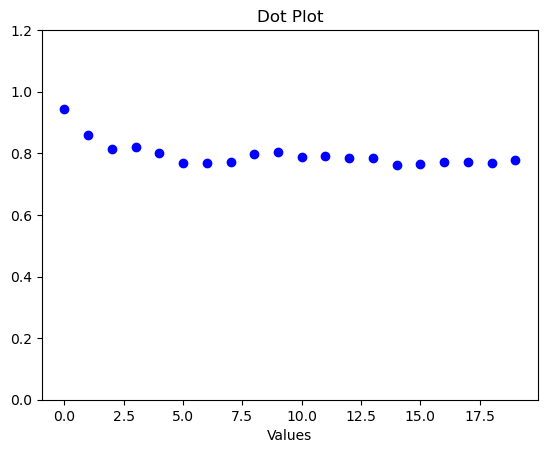

[0.9444444444444444, 0.8611111111111112, 0.8148148148148148, 0.8194444444444444, 0.8, 0.7685185185185185, 0.7698412698412699, 0.7708333333333334, 0.7962962962962963, 0.8055555555555556, 0.7878787878787878, 0.7916666666666666, 0.7863247863247863, 0.7857142857142857, 0.762962962962963, 0.7638888888888888, 0.7712418300653595, 0.7716049382716049, 0.7690058479532164, 0.7777777777777778]


In [33]:
# Condition 5 trust along time
data = {}
temp = []
for subdir, dirs, files in os.walk('./user_answers/condition' + str(6)):
    for file in files:
        if file[0] == '.': continue
        file_path = os.path.join(subdir, file)
        json_obj = read_jsonl_files(file_path)
        res1 = compare_answers(json_obj, compare, step=1)
        res2 = compare_answers(json_obj, compare, step=2)
        res3 = compare_answers(json_obj, compare, step=3)
        
        data[json_obj['user_id']] = json_obj

count = {
    "ai_acc": [],
    "user_acc": [],
    "user_ans=ai_ans": []
}
ai_correct = 0
user_correct = 0
user_total = 0
user_ai_same = 0
for question in range(1, 21):
    gt = 'Meal ' + get_ground_truth(question=question)
    ai_ans = get_ai_ans_only(question=question, condition=6)
    if ai_ans == gt: ai_correct += 1
    count['ai_acc'].append(ai_correct / question)

    # get user acc
    for user in data.keys():
        user_ans = data[user][f'{question}_third']
        if user_ans == gt: user_correct += 1
        if user_ans == ai_ans: user_ai_same += 1
        user_total += 1
    count['user_acc'].append(user_correct / user_total)
    count['user_ans=ai_ans'].append(user_ai_same / user_total)

print(count)

data = count['user_ans=ai_ans']

x = range(len(data))
print(x)
print(data)
plt.plot(x, data, 'bo', label='Dot Plot')
plt.title('Dot Plot')
plt.xlabel('Values') 
plt.ylim(0, 1.2)

plt.show()

print(data)